# Deutsch's algorithm

In [15]:
pip install pylatexenc

Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

### Circuit for $U_f$

The very first thing we need is the function $f: \{0, 1\} \mapsto \{0, 1\}$ and a circuit implementing it. Let's choose a very simple $f$:
$$
\text{Balanced:} \quad f(0) = 0 \quad f(1) = 1 \\
\text{Constant:} \quad f(0) = f(1) = 0
$$
Here's a simple circuit which performs
$$
U_f |x\rangle |y\rangle = |x\rangle | y \oplus f(x)\rangle
$$

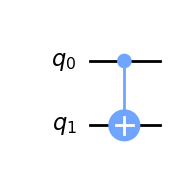

In [17]:
def get_U_f(balanced):
    circ = QuantumCircuit(2, name='$U_f$')
    # If the function is not balanced, do nothing since f(x) = 0
    if balanced:
        circ.cx(0, 1)
    return circ

get_U_f(True).draw('mpl')

Choose either constant or balanced:

In [18]:
balanced = False
U_f = get_U_f(balanced)

### The algorithm

Now we put together the algorithm:

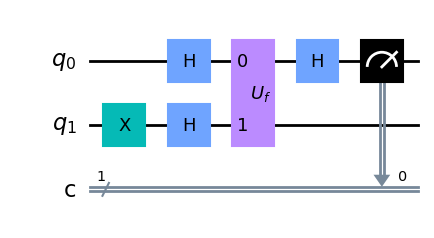

In [19]:
circ = QuantumCircuit(2, 1)
# First the second qubit is flipped |0> -> |1>
circ.x(1)
circ.barrier()
# Then we apply a Hadamards on both qubits
circ.h([0, 1])
# Then apply U_f
circ.append(U_f, [0, 1])
# Finally, a Hadamard on the first qubit
circ.h(0)
# Now we measure the first qubit
circ.measure(0, 0)

circ.draw('mpl', plot_barriers=False)

### Running the algorithm

In [20]:
# Get the QASM backend 
backend = Aer.get_backend('qasm_simulator')
# Run and get results
results = execute(circ, backend, shots=1024).result()

In [21]:
counts = results.get_counts()
print(counts)

{'0': 1024}


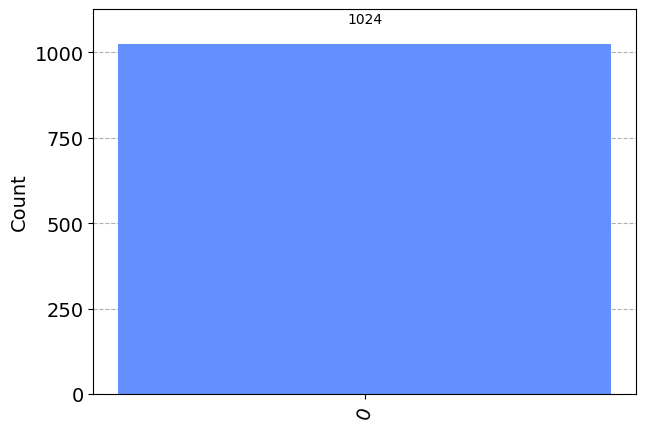

In [22]:
plot_histogram(counts)

Interpretation of results:  
$0 \rightarrow f$ is constant  
$1 \rightarrow f$ is balanced